#**Step 1: Install and Import Libraries**#


In [1]:
!pip install textblob wordcloud openpyxl

from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from google.colab import files

#**Step 2: Upload Excel & Read It**#

In [2]:
import pandas as pd

# Read Excel File
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BAA3064 - Web and Social Media Analytics/Group Assignment/BAA3064_MyBurgerLab_Comments.xlsx')

# Preview the first few rows
df.head()
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BAA3064 - Web and Social Media Analytics/Group Assignment/BAA3064_MyBurgerLab_Comments.xlsx', sheet_name='Text Data')

#**Step 3: Sentiment Analysis using TextBlob**#

In [3]:
def get_sentiment(text):
    try:
        analysis = TextBlob(str(text))
        if analysis.sentiment.polarity > 0.05:
            return 'Positive'
        elif analysis.sentiment.polarity < -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    except:
        return 'Neutral'

df['Sentiment'] = df['Comments'].apply(get_sentiment)

#**Step 4: Sentiment Distribution by Platform (Pie Charts)**#

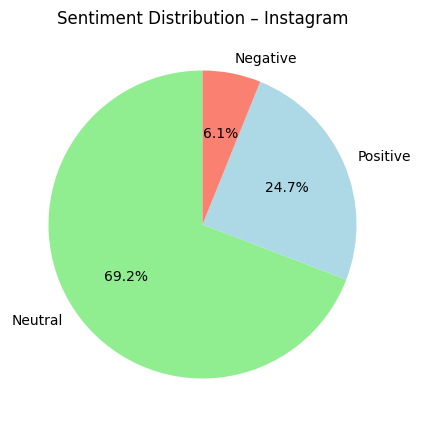

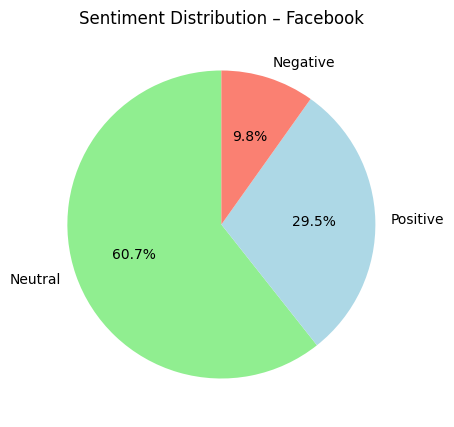

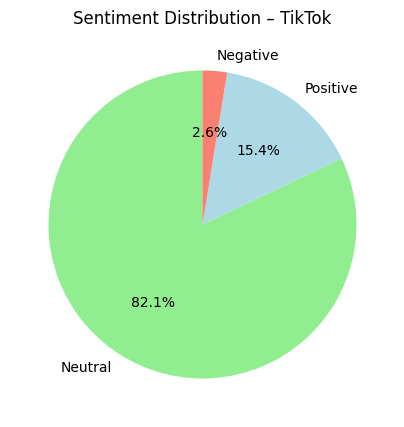

In [4]:
platforms = df['Platform'].unique()

for platform in platforms:
    plt.figure(figsize=(5, 5))
    df[df['Platform'] == platform]['Sentiment'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        title=f"Sentiment Distribution – {platform}",
        colors=["lightgreen", "lightblue", "salmon"]
    )
    plt.ylabel("")
    plt.show()

#**Step 5: Word Clouds by Sentiment**#

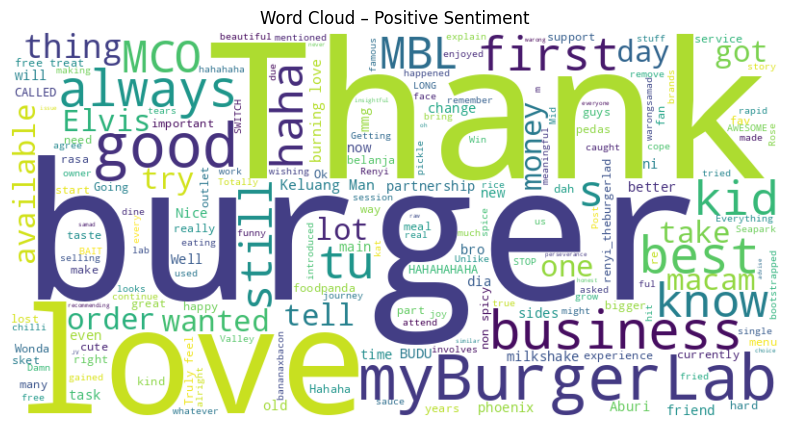

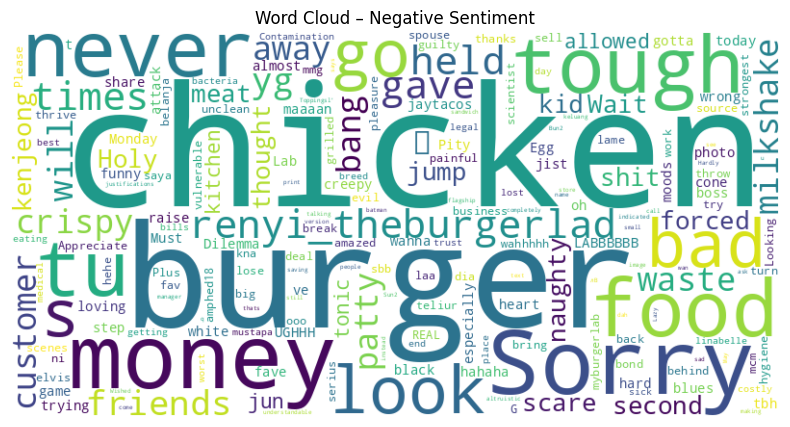

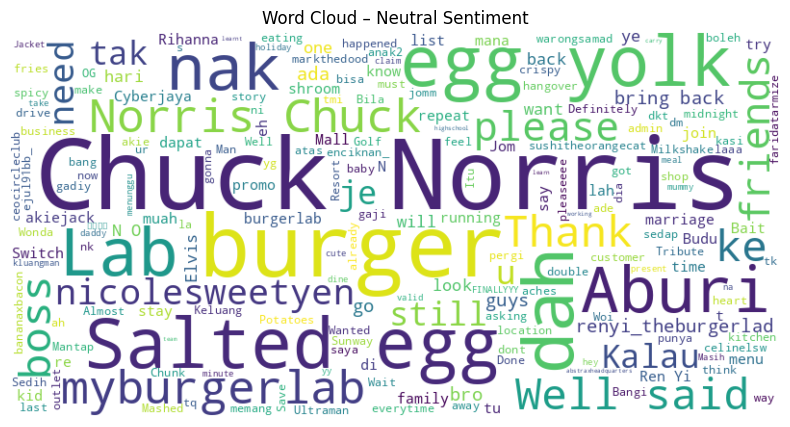

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['Comments'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud – {sentiment} Sentiment")
    plt.axis('off')
    plt.show()

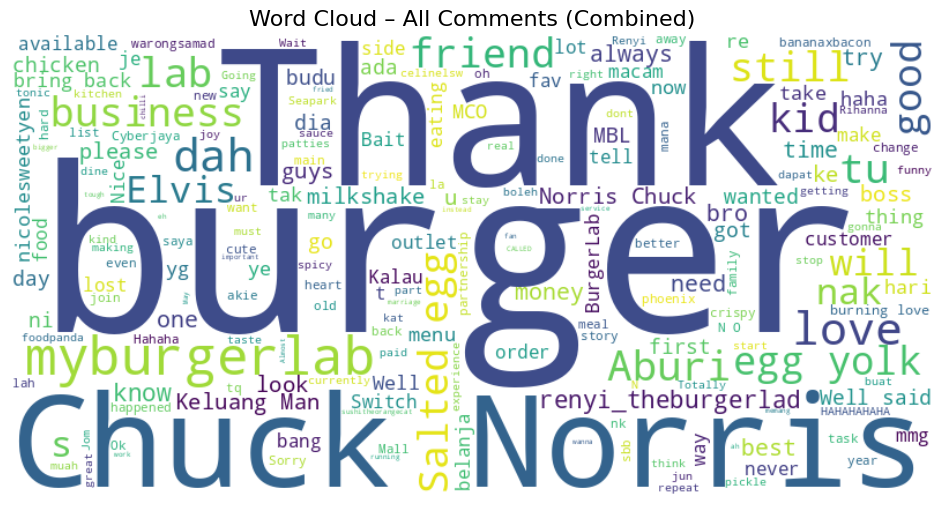

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments (convert to strings)
all_text = ' '.join(df['Comments'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(all_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud – All Comments (Combined)', fontsize=16)
plt.show()

#**Step 6: Concept Mining (TF-IDF + KMeans + Descriptive Pie Chart)**#

In [7]:
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Comments'].astype(str))

# 2. KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

#**Step 7: Identify Top Keywords Per Cluster**#


In [8]:
# Get top keywords for each cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Print top 10 keywords for each cluster to help with naming
for i in range(kmeans.n_clusters):
    print(f"Cluster {i} top keywords:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))
    print("-" * 40)

Cluster 0 top keywords:
burger, thank, aburi, lab, love, myburgerlab, nak, thanks, good, renyi_theburgerlad
----------------------------------------
Cluster 1 top keywords:
said, bro, iamkayleenguyen, haha, haahahahahahah, gym, guys, guns, guilty, guess
----------------------------------------
Cluster 2 top keywords:
salted, egg, yolk, pleaseeee, way, rose, celinelsw, ultraman, og, lactose
----------------------------------------
Cluster 3 top keywords:
norris, chuck, chunk, myburgerlab, stay, lowkey, ofc, needs, renyi_theburgerlad, menu
----------------------------------------


#**Step 8: Map Cluster Numbers to Descriptive Labels**#

In [9]:
cluster_names = {
    0: 'Brand Appreciation & Loyalty',
    1: 'Community Engagement & Humour',
    2: 'Product Cravings & Suggestions',
    3: 'Menu Highlights & Product Identity'
}

# Add a new column with readable cluster labels
df['Cluster_Label'] = df['Cluster'].map(cluster_names)

#**Step 9: Plot Concept Cluster Pie Chart with Labels**#

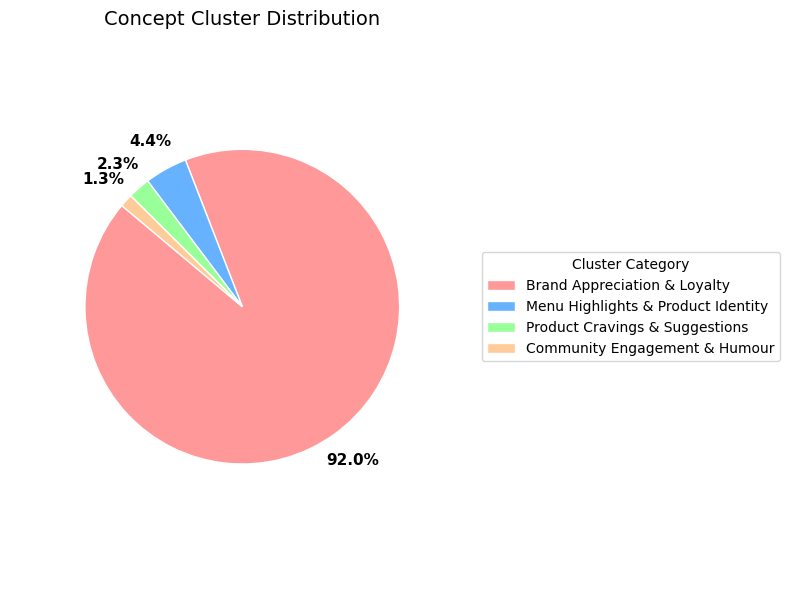

In [10]:
import matplotlib.pyplot as plt

# Count the number of comments in each cluster label
cluster_counts = df['Cluster_Label'].value_counts()

# Define colors
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"]

# Plot pie chart with labels outside
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    cluster_counts,
    labels=None,  # Disable inline labels
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="black", fontsize=12),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    pctdistance=1.2  # Push % labels outside the pie
)

# Adjust percentage label appearance
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Add a legend with descriptive labels
plt.legend(
    cluster_counts.index,
    title="Cluster Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Title and layout
plt.title("Concept Cluster Distribution", fontsize=14)
ax.axis('equal')
plt.tight_layout()
plt.show()
